# COMP 5310 Project Stage 1
Explore, clean, summarise and analyse the data

Source: [Kaggle - Mental health in the pregnancy during the COVID-19](https://www.kaggle.com/datasets/yeganehbavafa/mental-health-in-the-pregnancy-during-the-covid-19)

## 1. Overview

In [1]:
# Import the necessary libraries
from typing import Optional
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Set the random seed for reproducibility
RANDOM_SEED = 9182
np.random.seed(RANDOM_SEED) # According to the UniKey
# Set the options for the warnings library to avoid future warnings
warnings.filterwarnings('ignore')
# Set the options for the pandas library to avoid future warnings
pd.set_option('future.no_silent_downcasting', True)
# Set the style for the matploftlib library
plt.style.use('ggplot')
height = 6
aspect = 8 / height

In [2]:
# Load the data
df = pd.read_csv('data.csv')
df.head(5)

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [3]:
# Check the data complexity
df.shape

(10772, 16)

In [4]:
# Check the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSF_ID                                      10772 non-null  int64  
 1   Maternal_Age                                10661 non-null  float64
 2   Household_Income                            10521 non-null  object 
 3   Maternal_Education                          10595 non-null  object 
 4   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 5   PROMIS_Anxiety                              9566 non-null   float64
 6   Gestational_Age_At_Birth                    6734 non-null   float64
 7   Delivery_Date(converted to month and year)  6733 non-null   object 
 8   Birth_Length                                5480 non-null   float64
 9   Birth_Weight                                6078 non-null   float64
 10  Delivery_M

In [5]:
# Regard empty strings as missing values
df.replace(" ", np.nan, inplace=True)

In [6]:
# Correct the data type of the columns based on the data dictionary
df['Threaten_Life'] = df['Threaten_Life'].astype('Int64')
df['Threaten_Baby_Danger'] = df['Threaten_Baby_Danger'].astype('Int64')
df['Threaten_Baby_Harm'] = df['Threaten_Baby_Harm'].astype('Int64')

In [7]:
# Check the missing values in each column
df.isna().sum()

OSF_ID                                           0
Maternal_Age                                   111
Household_Income                               251
Maternal_Education                             177
Edinburgh_Postnatal_Depression_Scale          1174
PROMIS_Anxiety                                1206
Gestational_Age_At_Birth                      4038
Delivery_Date(converted to month and year)    4039
Birth_Length                                  5292
Birth_Weight                                  4694
Delivery_Mode                                 5235
NICU_Stay                                     5238
Language                                         0
Threaten_Life                                  896
Threaten_Baby_Danger                           904
Threaten_Baby_Harm                             892
dtype: int64

In [8]:
# Check the statistics of the missing values by row
missing_counts = df.isnull().sum(axis=1)
missing_counts.describe()

count    10772.000000
mean         3.169978
std          3.407651
min          0.000000
25%          0.000000
50%          3.000000
75%          6.000000
max         14.000000
dtype: float64

In [9]:
# Directly remove the rows with more than 10 missing values
df = df[missing_counts <= 10]
df.shape

(10245, 16)

In [10]:
# Drop the missing values in the target columns
df = df.dropna(subset=['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety'])
df.shape

(9566, 16)

In [11]:
# Check the missing values in each column
df.isna().sum()

OSF_ID                                           0
Maternal_Age                                    30
Household_Income                                57
Maternal_Education                              40
Edinburgh_Postnatal_Depression_Scale             0
PROMIS_Anxiety                                   0
Gestational_Age_At_Birth                      3349
Delivery_Date(converted to month and year)    3350
Birth_Length                                  4389
Birth_Weight                                  3872
Delivery_Mode                                 4338
NICU_Stay                                     4341
Language                                         0
Threaten_Life                                    0
Threaten_Baby_Danger                             0
Threaten_Baby_Harm                               0
dtype: int64

In [12]:
# Check the statistics of the data by column
df.describe()

,OSF_ID,Maternal_Age,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
count,9566.000000,9536.000000,9566.000000,9566.000000,6217.000000,5177.000000,5694.000000,9566.0,9566.0,9566.0
mean,5375.802948,31.917135,10.189421,18.677713,39.351094,50.499156,3410.886196,42.345494,50.830546,62.429333
std,3112.828175,4.380005,5.505201,6.084313,1.604304,4.433739,537.850050,25.616148,26.608938,27.19428
min,1.000000,17.000000,0.000000,7.000000,24.860000,20.000000,303.000000,0.0,0.0,0.0
25%,2680.250000,29.000000,6.000000,14.000000,38.570000,49.000000,3100.000000,23.0,30.0,48.0
50%,5368.500000,31.800000,10.000000,19.000000,39.570000,50.800000,3431.000000,47.0,50.0,66.0
75%,8082.750000,34.800000,14.000000,23.000000,40.430000,53.300000,3742.000000,61.0,71.0,85.0
max,10772.000000,49.700000,30.000000,35.000000,42.860000,70.000000,5968.000000,100.0,100.0,100.0


In [13]:
# Column names before renaming
df.columns.tolist()[7]

'Delivery_Date(converted to month and year)'

In [14]:
# Column names after renaming
df = df.rename(columns={'Delivery_Date(converted to month and year)': 'Delivery_Date'})
df.columns.tolist()[7]

'Delivery_Date'

In [15]:
# Check the data type of the columns
df.dtypes

OSF_ID                                    int64
Maternal_Age                            float64
Household_Income                         object
Maternal_Education                       object
Edinburgh_Postnatal_Depression_Scale    float64
PROMIS_Anxiety                          float64
Gestational_Age_At_Birth                float64
Delivery_Date                            object
Birth_Length                            float64
Birth_Weight                            float64
Delivery_Mode                            object
NICU_Stay                                object
Language                                 object
Threaten_Life                             Int64
Threaten_Baby_Danger                      Int64
Threaten_Baby_Harm                        Int64
dtype: object

In [16]:
# Scale the birth weight to kilograms
df['Birth_Weight'] = df['Birth_Weight'] / 1000

## 2. Data normalisation

### Convert the data types

#### Delivery_Date

In [17]:
# Convert the delivery date to datetime
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%b%Y')
str(df.dtypes['Delivery_Date'])

'datetime64[ns]'

In [18]:
# Check whether the delivery data contains missing values
df['Delivery_Date'].isna().any()

True

#### Language

In [19]:
# Check if there are any missing values in the 'Language' column
df['Language'].isna().any()

False

In [20]:
# One-hot encode the 'Language' column
df['Language_English'] = df['Language'].replace({'English': 1, 'French': 0}).astype(int)
df['Language_French'] = df['Language'].replace({'English': 0, 'French': 1}).astype(int)
df = df.drop(columns=['Language'], axis=1)

## 3. Data cleaning

### Categorise the missing values
- Numerical encoding
- Onehot encoding

#### Household_Income

In [21]:
# Check if there are any missing values in the 'Household_Income' column
df['Household_Income'].isna().mean()

0.00595860338699561

In [22]:
# Check the unique values in the 'Household_Income' column before filling the missing values
df['Household_Income'].unique()

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', '$70,000-$99,999', '$175,000- $199,999',
       '$125,000- $149,999', '$20,000- $39,999', 'Less than $20, 000',
       nan], dtype=object)

In [23]:
# Fill the missing values in the 'Household_Income' column with 'Unknown'
df['Household_Income'] = df['Household_Income'].fillna('Unknown')

In [24]:
# Check the unique values in the 'Household_Income' column after filling the missing values
df["Household_Income"].unique()

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', '$70,000-$99,999', '$175,000- $199,999',
       '$125,000- $149,999', '$20,000- $39,999', 'Less than $20, 000',
       'Unknown'], dtype=object)

In [25]:
df['Household_Income'].nunique()

10

In [26]:
# Eliminate the whitespace in the 'Household_Income' column in order to make the mapping easier
df.loc[df['Household_Income'].str.startswith('$'), 'Household_Income'] = df['Household_Income'].str.replace(' ', '', regex=True)
# Create a dictionary to map the 'Household_Income' column to numerical values
income_to_level = {
    'Unknown': 0,
    'Less than $20, 000': 1,
    '$20,000-$39,999': 2,
    '$40,000-$69,999': 3,
    '$70,000-$99,999': 4,
    '$100,000-$124,999': 5,
    '$125,000-$149,999': 6,
    '$150,000-$174,999': 7,
    '$175,000-$199,999': 8,
    '$200,000+': 9,
}
level_to_income = {v: k for k, v in income_to_level.items()}

In [27]:
# Replace the values in the 'Household_Income' column with the numerical values
df['Household_Income'] = df['Household_Income'].replace(income_to_level).astype(int)
df['Household_Income'].head()

0    9
1    9
3    5
4    3
5    7
Name: Household_Income, dtype: int64

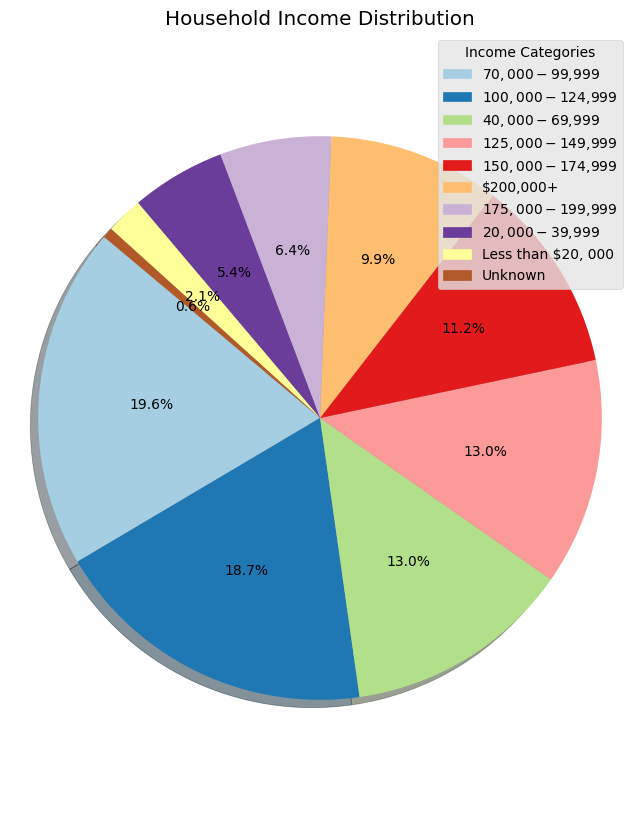

In [28]:
# Plot the distribution of the 'Household_Income' column
colors = plt.cm.Paired(np.linspace(0, 1, len(level_to_income)))
income_counts = df['Household_Income'].value_counts()
patches = [mpatches.Patch(color=colors[index], label=level_to_income[category]) for index, category in enumerate(income_counts.index)]
plt.figure(figsize=(8, 10))
plt.pie(
    income_counts.values, 
    autopct='%1.1f%%', startangle=140, shadow=True, colors=colors)
plt.title('Household Income Distribution') 
plt.legend(handles=patches, title='Income Categories', loc='upper right')
plt.axis('equal')
plt.show()

#### Maternal_Education

In [29]:
# Compute the proportion of missing values in the 'Maternal_Education' column
df['Maternal_Education'].isna().mean()

0.004181476061049551

In [30]:
# Check the unique values in the 'Maternal_Education' column before filling the missing values
df["Maternal_Education"].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       'College/trade school', 'Less than high school diploma',
       'Doctoral Degree', nan], dtype=object)

In [31]:
# Fill the missing values in the 'Maternal_Education' column with 'Unknown'
df["Maternal_Education"] = df["Maternal_Education"].fillna("Unknown")
df["Maternal_Education"].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       'College/trade school', 'Less than high school diploma',
       'Doctoral Degree', 'Unknown'], dtype=object)

In [32]:
# Count the number of unique values in the 'Maternal_Education' column
df['Maternal_Education'].nunique()

7

In [33]:
# Create a dictionary to map the 'Maternal_Education' column to numerical values
education_to_level = {
    'Unknown': 0,
    'Less than high school diploma': 1,
    'High school diploma': 2,
    'College/trade school': 3,
    'Undergraduate degree': 4,
    'Masters degree': 5,
    'Doctoral Degree': 6,
}
level_to_education = {v: k for k, v in education_to_level.items()}

In [34]:
# Replace the values in the 'Maternal_Education' column with the numerical values
df['Maternal_Education'] = df['Maternal_Education'].replace(education_to_level).astype(int)
df['Maternal_Education'].head()

0    5
1    4
3    5
4    4
5    4
Name: Maternal_Education, dtype: int64

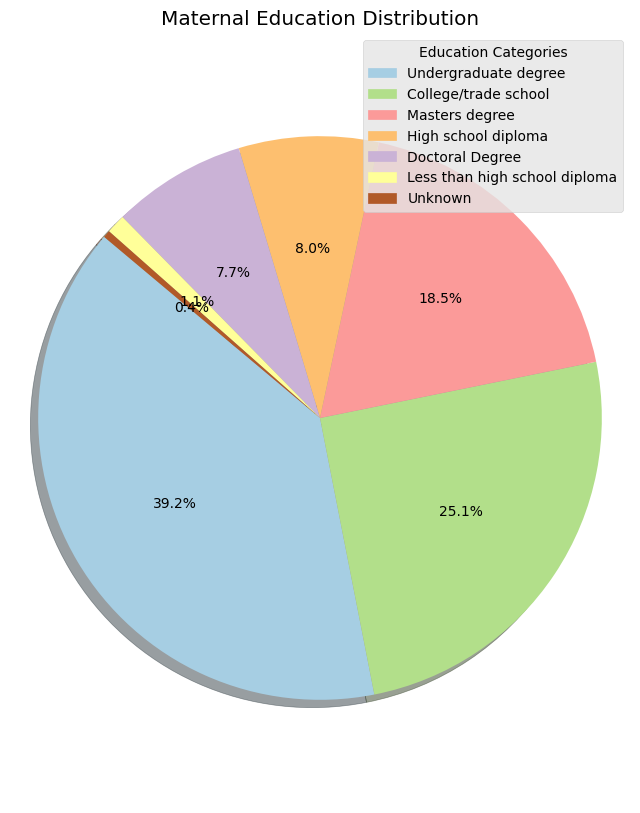

In [35]:
# Plot the distribution of the 'Maternal_Education' column
colors = plt.cm.Paired(np.linspace(0, 1, len(level_to_education)))
education_counts = df['Maternal_Education'].value_counts()
patches = [mpatches.Patch(color=colors[index], label=level_to_education[category]) for index, category in enumerate(education_counts.index)]
plt.figure(figsize=(8, 10))
plt.pie(
    education_counts.values, 
    autopct='%1.1f%%', startangle=140, shadow=True, colors=colors)
plt.title('Maternal Education Distribution') 
plt.legend(handles=patches, title='Education Categories', loc='upper right')
plt.axis('equal')
plt.show()

In [36]:
# Check the missing values in each column
df.isna().sum()

OSF_ID                                     0
Maternal_Age                              30
Household_Income                           0
Maternal_Education                         0
Edinburgh_Postnatal_Depression_Scale       0
PROMIS_Anxiety                             0
Gestational_Age_At_Birth                3349
Delivery_Date                           3350
Birth_Length                            4389
Birth_Weight                            3872
Delivery_Mode                           4338
NICU_Stay                               4341
Threaten_Life                              0
Threaten_Baby_Danger                       0
Threaten_Baby_Harm                         0
Language_English                           0
Language_French                            0
dtype: int64

#### Delivery_Mode

In [37]:
# Compute the proportion of missing values in the 'Delivery_Mode' column
df['Delivery_Mode'].isna().mean()

0.4534810788208237

In [38]:
# Check the unique values in the 'Delivery_Mode' column before filling the missing values
df['Delivery_Mode'].unique()

array(['Vaginally', nan, 'Caesarean-section (c-section)'], dtype=object)

In [39]:
# Replace the complex category name with a simpler one
df['Delivery_Mode'] = df['Delivery_Mode'].replace('Caesarean-section (c-section)', 'C-section')

In [40]:
print(f'The percentage of Vaginally: {len(df['Delivery_Mode'][df['Delivery_Mode'] == 'Vaginally']) / len(df['Delivery_Mode']):.2%}')
print(f'The percentage of C-section: {len(df['Delivery_Mode'][df['Delivery_Mode'] == 'C-section']) / len(df['Delivery_Mode']):.2%}')

The percentage of Vaginally: 38.66%
The percentage of C-section: 15.99%


#### NICU_Stay

In [41]:
# Compute the proportion of missing values in the 'NICU_Stay' column
df['NICU_Stay'].isna().mean()

0.4537946895254025

In [42]:
print(f'{len(df['NICU_Stay'][df['NICU_Stay'] == 'Yes']) / len(df['NICU_Stay']):.2%}')
print(f'{len(df['NICU_Stay'][df['NICU_Stay'] == 'No']) / len(df['NICU_Stay']):.2%}')

5.32%
49.30%


In [43]:
# Define a function to perform one-hot encoding
def onehot_encoding(df: pd.DataFrame, column_name: str, categories: list, drop: bool=True) -> pd.DataFrame:
    """
    Encode the categorical column using one-hot encoding.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - column_name (str): The name of the column to be encoded.
    - categories (list): The list of categories in the column.
    - drop (bool): Whether to drop the original column or not.

    Returns:
    - df (pd.DataFrame): The DataFrame with the one-hot encoded column.
    """
    for category in categories:
        if category.lower() == 'unknown':
            df[column_name + '_' + category] = pd.isna(df[column_name]).astype(int)
        else:
            df[column_name + '_' + category] = (df[column_name] == category).astype(int)
    if drop:
        df = df.drop(columns=[column_name], axis=1)
    return df

In [44]:
# Do one-hot encoding for the 'Delivery_Mode' column
df = onehot_encoding(df, 'Delivery_Mode', ['Vaginally', 'C-section', 'Unknown'])

In [45]:
# Do one-hot encoding for the 'NICU_Stay' column
df = onehot_encoding(df, 'NICU_Stay', ['Yes', 'No', 'Unknown'])

### Predictive impuation

#### Birth_Length & Birth_Weight

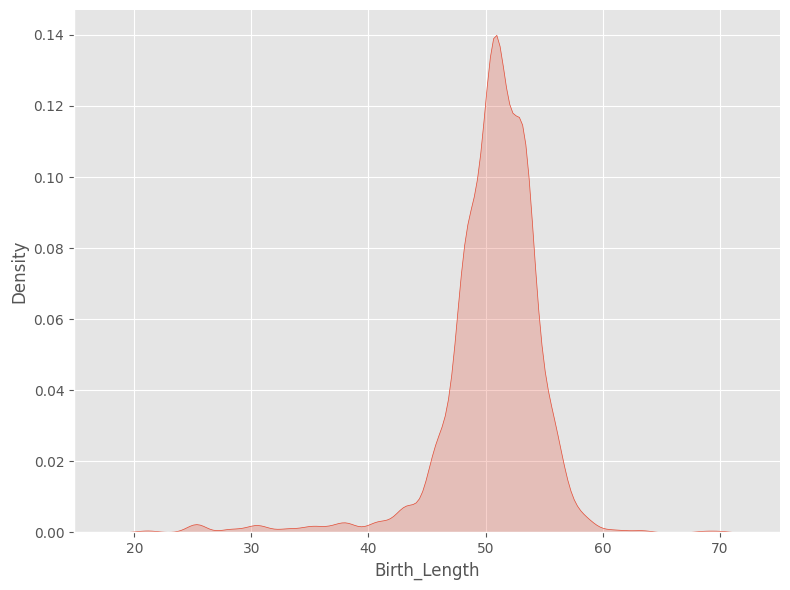

In [46]:
# Plot the KDE plot of the 'Birth_Length' column
sns.displot(
    df, x='Birth_Length', kind='kde', fill=True,
    height=height, aspect=aspect,
)
plt.show()

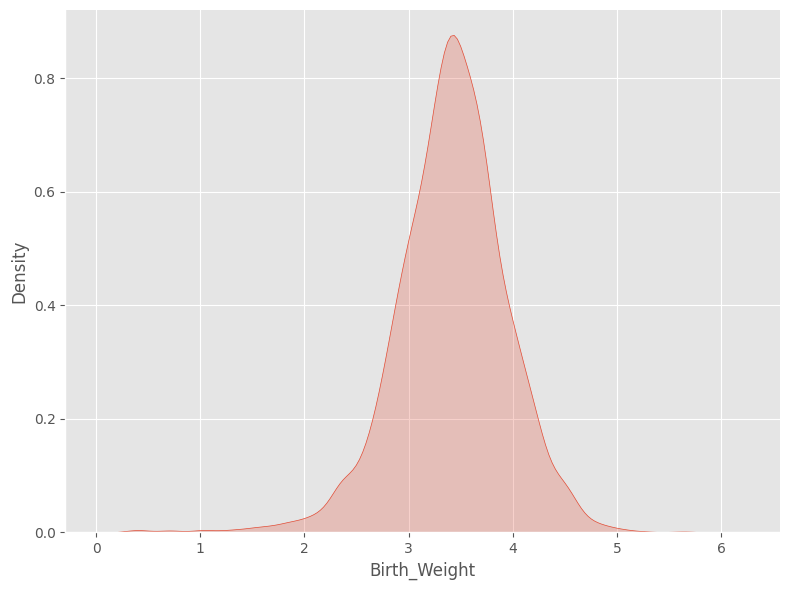

In [47]:
# Plot the KDE plot of the 'Birth_Weight' column
sns.displot(
    df, x='Birth_Weight', kind='kde', fill=True, 
    height=height, aspect=aspect,
)
plt.show()

In [48]:
# Calculate the KDE for the 'Birth_Length' and 'Birth_Weight' columns
# Also, calculate the maximum and minimum values for the columns
kde_length = stats.gaussian_kde(df['Birth_Length'].dropna())
kde_weight = stats.gaussian_kde(df['Birth_Weight'].dropna())
max_length = np.max(df['Birth_Length'])
max_weight = np.max(df['Birth_Weight'])
min_length = np.min(df['Birth_Length'])
min_weight = np.min(df['Birth_Weight'])

In [49]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight'
length_and_weight = df[['Birth_Length', 'Birth_Weight']].dropna()
stats.pearsonr(length_and_weight['Birth_Length'], length_and_weight['Birth_Weight'])

PearsonRResult(statistic=0.4662454021432731, pvalue=9.672131678633578e-278)

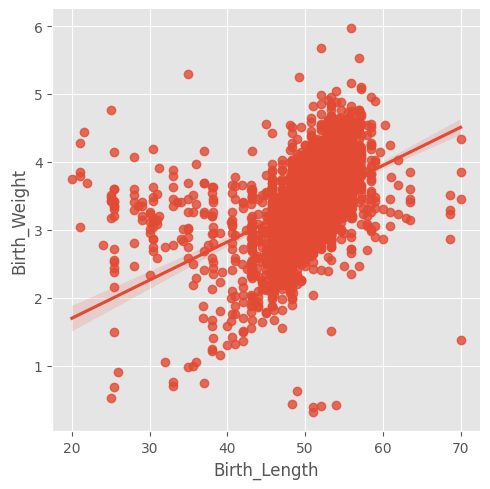

In [50]:
# Plot the scatter plot of 'Birth_Length' and 'Birth_Weight' with the regression line
sns.lmplot(x='Birth_Length', y='Birth_Weight', data=length_and_weight)
plt.show()

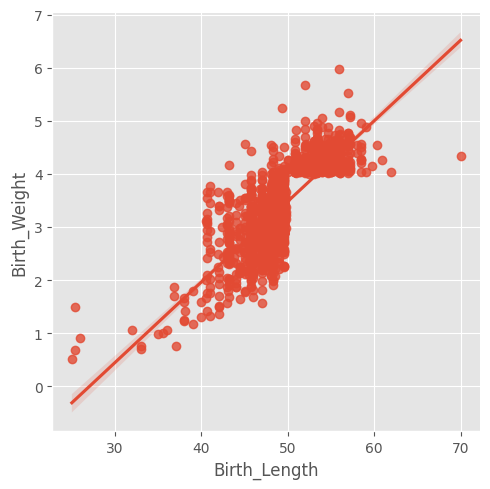

In [51]:
# Truncate the 'Birth_Length' and 'Birth_Weight' columns for better linear regression fitting
condition1 = (length_and_weight['Birth_Length'] <= 40) & (length_and_weight['Birth_Weight'] >= 2)
condition2 = (length_and_weight['Birth_Length'] >= 50) & (length_and_weight['Birth_Weight'] <= 4)
condition3 = (length_and_weight['Birth_Length'] >= 45) & (length_and_weight['Birth_Weight'] <= 1)
length_and_weight_filtered = length_and_weight[~(condition1 | condition2 | condition3)]
sns.lmplot(x='Birth_Length', y='Birth_Weight', data=length_and_weight_filtered)
plt.show()

In [52]:
# Check the shape of the filtered data
length_and_weight_filtered.shape

(2104, 2)

In [53]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight' after filtering
stats.pearsonr(length_and_weight_filtered['Birth_Length'], length_and_weight_filtered['Birth_Weight'])

PearsonRResult(statistic=0.7924203979198934, pvalue=0.0)

In [54]:
# Fit a linear regression model to the 'Birth_Length' and 'Birth_Weight' columns
reg = LinearRegression().fit(length_and_weight_filtered[['Birth_Length']], length_and_weight_filtered['Birth_Weight'])
print(f'The slope of the regression line is: {reg.coef_[0]:.2f}')
print(f'The intercept of the regression line is: {reg.intercept_:.2f}')
print(f'The R^2 value of the regression line is: {reg.score(length_and_weight_filtered[['Birth_Length']], length_and_weight_filtered['Birth_Weight']):.2f}')

The slope of the regression line is: 0.15
The intercept of the regression line is: -4.10
The R^2 value of the regression line is: 0.63


In [55]:
# Define a function to predict the birth weight based on the birth length and vice versa
def predict_weight(length: float) -> float:
    """
    Predict the birth weight based on the birth length using the linear regression model.

    Parameters:
    - length (float): The birth length in centimeters.

    Returns:
    - weight (float): The predicted birth weight in kilograms.
    """
    if length > 40 and length < 50:
        return reg.coef_[0] * length + reg.intercept_
    else:
        return np.nan

def predict_length(weight: float) -> float:
    """
    Predict the birth length based on the birth weight using the linear regression model.

    Parameters:
    - weight (float): The birth weight in kilograms.

    Returns:
    - length (float): The predicted birth length in centimeters.
    """
    if weight > 2000 and weight < 4000:
        return (weight - reg.intercept_) / reg.coef_[0]
    else:
        return np.nan

In [56]:
# Compare how many missing values before and after imputation
print(f'The missing values in the Birth_Weight column: {df['Birth_Weight'].isna().sum()}')
print(f'The missing values in the Birth_Length column: {df['Birth_Length'].isna().sum()}')
df['Birth_Weight'] = df['Birth_Weight'].fillna(df['Birth_Length'].apply(predict_weight))
df['Birth_Length'] = df['Birth_Length'].fillna(df['Birth_Weight'].apply(predict_length))
print(f'The missing values in the Birth_Weight column: {df['Birth_Weight'].isna().sum()}')
print(f'The missing values in the Birth_Length column: {df['Birth_Length'].isna().sum()}')

The missing values in the Birth_Weight column: 3872
The missing values in the Birth_Length column: 4389
The missing values in the Birth_Weight column: 3871
The missing values in the Birth_Length column: 4389


In [57]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight' after imputation
stats.pearsonr(df[['Birth_Length', 'Birth_Weight']].dropna()['Birth_Length'], df[['Birth_Length', 'Birth_Weight']].dropna()['Birth_Weight'])

PearsonRResult(statistic=0.4663044962493492, pvalue=7.129650988519702e-278)

In [58]:
# Fit a KNN regression model to the 'Birth_Length' and 'Birth_Weight' columns
knn1 = KNeighborsRegressor(weights='distance', n_jobs=-1)
knn1.fit(length_and_weight['Birth_Length'].to_numpy().reshape(-1, 1), length_and_weight['Birth_Weight'])

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [59]:
# Fit a KNN regression model to the 'Birth_Length' and 'Birth_Weight' columns after imputation
knn2 = KNeighborsRegressor(weights='distance', n_jobs=-1)
knn2.fit(length_and_weight['Birth_Weight'].to_numpy().reshape(-1, 1), length_and_weight['Birth_Length'])

KNeighborsRegressor(n_jobs=-1, weights='distance')

In [60]:
def predict_weight_knn(length: float) -> float:
    """
    Predict the birth weight based on the birth length using the KNN regression model.

    Parameters:
    - length (float): The birth length in centimeters.

    Returns:
    - weight (float): The predicted birth weight in kilograms.
    """
    if length is np.nan:
        return np.nan
    return knn1.predict([[length]])[0]

def predict_length_knn(weight: float) -> float:
    """
    Predict the birth length based on the birth weight using the KNN regression model.

    Parameters:
    - weight (float): The birth weight in kilograms.

    Returns:
    - length (float): The predicted birth length in centimeters.
    """
    if weight is np.nan:
        return np.nan
    return knn2.predict([[weight]])[0]

In [61]:
# Only keep the rows with missing values in the 'Birth_Weight' or 'Birth_Length' columns (not both or neither)
filter1 = (~df['Birth_Length'].isna() & df['Birth_Weight'].isna())
filter2 = (df['Birth_Length'].isna() & ~df['Birth_Weight'].isna())
print(f'The missing values in the Birth_Weight column: {df['Birth_Weight'].isna().sum()}')
print(f'The missing values in the Birth_Length column: {df['Birth_Length'].isna().sum()}')
df.loc[filter1, 'Birth_Weight'] = df.loc[filter1, 'Birth_Length'].apply(predict_weight_knn)
df.loc[filter2, 'Birth_Length'] = df.loc[filter2, 'Birth_Weight'].apply(predict_length_knn)
print(f'The missing values in the Birth_Weight column: {df['Birth_Weight'].isna().sum()}')
print(f'The missing values in the Birth_Length column: {df['Birth_Length'].isna().sum()}')

The missing values in the Birth_Weight column: 3871
The missing values in the Birth_Length column: 4389
The missing values in the Birth_Weight column: 3871
The missing values in the Birth_Length column: 3871


In [62]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight' after imputation
length_and_weight_filled = df[['Birth_Length', 'Birth_Weight']].dropna()
stats.pearsonr(length_and_weight_filled['Birth_Length'], length_and_weight_filled['Birth_Weight'])

PearsonRResult(statistic=0.4813602077707341, pvalue=0.0)

#### Maternal_Age / Delivery_Date / Gestational_Age_At_Birth

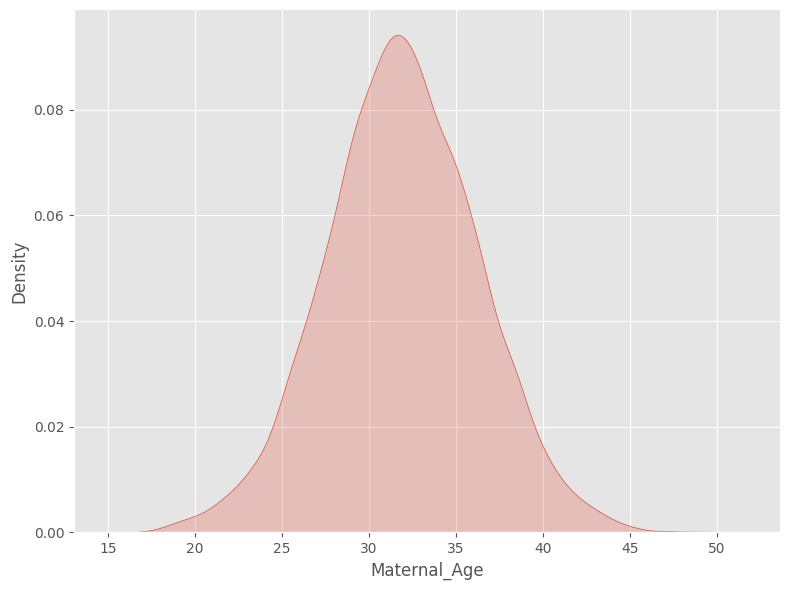

In [63]:
# Plot the KDE plot of the 'Maternal_Age' column
sns.displot(
    df, x='Maternal_Age', kind='kde', fill=True, bw_adjust=1,
    height=height, aspect=aspect)
plt.show()

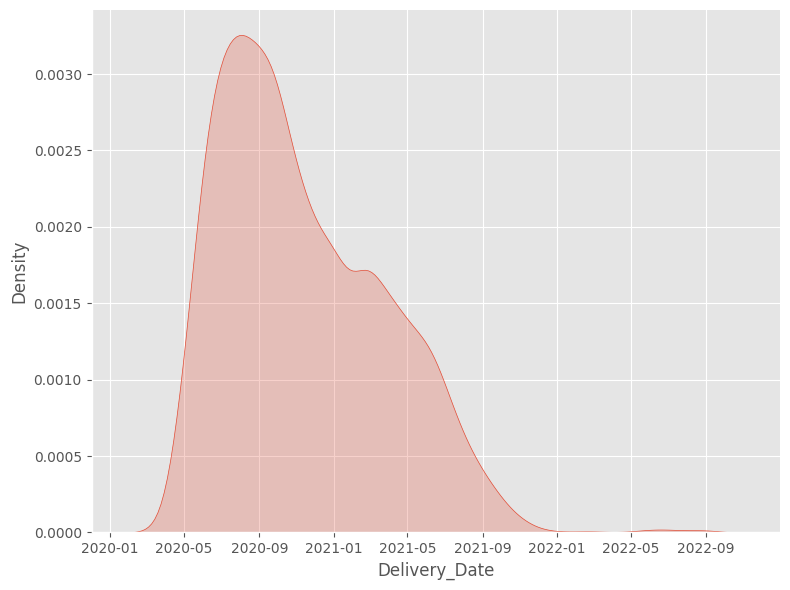

In [64]:
# Plot the KDE plot of the 'Delivery_Date' column
sns.displot(
    df, x='Delivery_Date', kind='kde', fill=True, bw_adjust=1, 
    height=height, aspect=aspect)
plt.show()

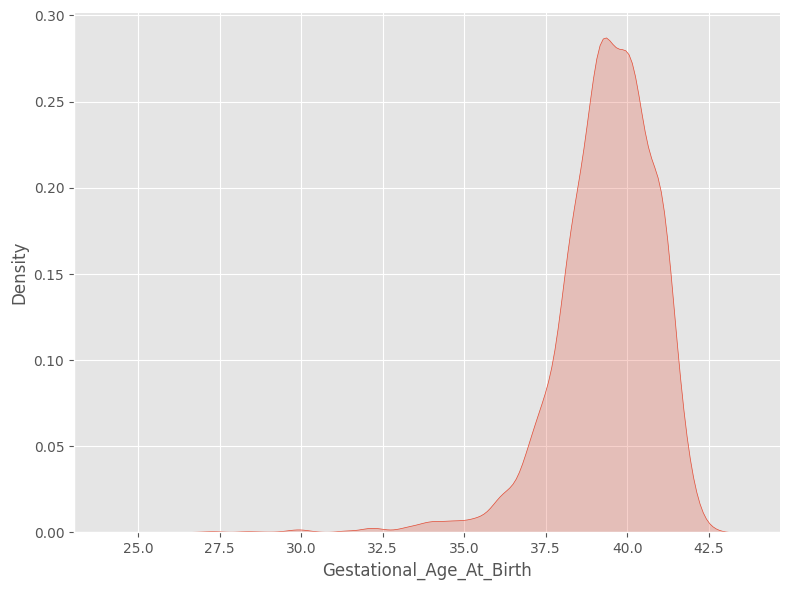

In [65]:
# Plot the KDE plot of the 'Gestational_Age_At_Birth' column
sns.displot(
    df, x='Gestational_Age_At_Birth', kind='kde', fill=True, bw_adjust=1, 
    height=height, aspect=aspect)
plt.show()

In [66]:
# Define a function to impute missing values using the KNN algorithm
def impute_with_kde(series: pd.Series, 
                    kde: Optional[stats.gaussian_kde]=None,
                    max_val: Optional[float]=None,
                    min_val: Optional[float]=None) -> np.ndarray:
    """
    Impute missing values in a column using a kernel density estimation.

    Parameters:
    - series: A pandas Series with missing values.
    - kde: A precomputed kernel density estimation. Default: None.
    - max_val: The maximum value of the series. Default: None.
    - min_val: The minimum value of the series. Default: None.
    
    Returns:
    - fill_values: An array of imputed values.
    """
    if max_val is None:
        max_val = series.max()
    if min_val is None:
        min_val = series.min()
    # Create a kernel density estimation
    if kde is None:
        kde = stats.gaussian_kde(series.dropna())
    # Count the number of missing values in the series
    num_missing = series.isna().sum()
    # Generate random samples from the kernel density estimation
    fill_values = kde.resample(num_missing)[0]
    # Clip the fill values to the min and max of the original series
    fill_values = np.clip(fill_values, min_val, max_val)
    return fill_values

In [67]:
# Impute the missing values in the 'Maternal_Age' column using the KDE method
column_name = 'Maternal_Age'
# Check the number of missing values before and after filling
print(f'The number of missing values in the {column_name} column: {df[column_name].isna().sum()}')
df.loc[df[column_name].isna(), column_name] = impute_with_kde(df[column_name])
print(f'The number of missing values in the {column_name} column after filling: {df[column_name].isna().sum()}')

The number of missing values in the Maternal_Age column: 30
The number of missing values in the Maternal_Age column after filling: 0


In [68]:
# Impute the missing values in the 'Delivery_Date' column using the KDE method
column_name = 'Delivery_Date'
column_name_temp = 'Time_Stamp'
# Convert the 'Delivery_Date' column to a timestamp
df[column_name_temp] = df[column_name].copy().apply(lambda x: x.value // 10**9 if pd.notnull(x) else np.nan).astype(float)
# Check the number of missing values before and after filling
print(f'The number of missing values in the {column_name} column: {df[column_name].isna().sum()}')
df.loc[df[column_name].isna(), column_name] = pd.to_datetime(impute_with_kde(df[column_name_temp]), unit='s')
df = df.drop(columns=[column_name_temp], axis=1)
print(f'The number of missing values in the {column_name} column after filling: {df[column_name].isna().sum()}')

The number of missing values in the Delivery_Date column: 3350
The number of missing values in the Delivery_Date column after filling: 0


In [69]:
# Impute the missing values in the 'Gestational_Age_At_Birth' column using the KDE method
column_name = 'Gestational_Age_At_Birth'
print(f'The number of missing values in the {column_name} column: {df[column_name].isna().sum()}')
df.loc[df[column_name].isna(), column_name] = impute_with_kde(df[column_name])
print(f'The number of missing values in the {column_name} column after filling: {df[column_name].isna().sum()}')

The number of missing values in the Gestational_Age_At_Birth column: 3349
The number of missing values in the Gestational_Age_At_Birth column after filling: 0


In [70]:
# Only choose 300 rows to impute the missing values for data integrity
column_name_1 = 'Birth_Length'
column_name_2 = 'Birth_Weight'
mask = df[[column_name_1, column_name_2]].isna().all(axis=1)
indices = df.loc[mask].index[:300]
df.loc[indices, column_name_1] = impute_with_kde(df.loc[indices, column_name_1], kde_length, max_length, min_length)
df.loc[indices, column_name_2] = impute_with_kde(df.loc[indices, column_name_2], kde_weight, max_weight, min_weight)

In [71]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight' after imputation
stats.pearsonr(df[['Birth_Length', 'Birth_Weight']].dropna()['Birth_Length'], df[['Birth_Length', 'Birth_Weight']].dropna()['Birth_Weight'])

PearsonRResult(statistic=0.45307058671167116, pvalue=2.2901612841140174e-301)

#### Birth_Length & Birth_Weight with Advanced Techniques

In [72]:
# Impute the rest of the missing values using the Iterative Imputer withh Random Forest Regressor
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=5, random_state=RANDOM_SEED), 
    missing_values=np.nan, max_iter=100, random_state=RANDOM_SEED)

impute_cols = [
    'Maternal_Age', 
    'Household_Income', 
    'Maternal_Education', 
    'Edinburgh_Postnatal_Depression_Scale',
    'PROMIS_Anxiety',
    'Gestational_Age_At_Birth',
    'Birth_Length',
    'Birth_Weight',
    'Threaten_Life',
    'Threaten_Baby_Danger',
    'Threaten_Baby_Harm',
    'Language_English',
    'Language_French',
    'Delivery_Mode_Vaginally',
    'Delivery_Mode_C-section',
    'Delivery_Mode_Unknown',
    'NICU_Stay_Yes',
    'NICU_Stay_No',
    'NICU_Stay_Unknown',
]

# Transform the data type of the columns to float64 for imputation
for col in impute_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('float64')

# Transform the data type of the columns to float64 for imputation
df_imputed = imputer.fit_transform(df[impute_cols])
df[impute_cols] = pd.DataFrame(df_imputed, columns=impute_cols, index=df.index)

In [73]:
# Check the missing values in each column (All done!)
df.isna().sum()

OSF_ID                                  0
Maternal_Age                            0
Household_Income                        0
Maternal_Education                      0
Edinburgh_Postnatal_Depression_Scale    0
PROMIS_Anxiety                          0
Gestational_Age_At_Birth                0
Delivery_Date                           0
Birth_Length                            0
Birth_Weight                            0
Threaten_Life                           0
Threaten_Baby_Danger                    0
Threaten_Baby_Harm                      0
Language_English                        0
Language_French                         0
Delivery_Mode_Vaginally                 0
Delivery_Mode_C-section                 0
Delivery_Mode_Unknown                   0
NICU_Stay_Yes                           0
NICU_Stay_No                            0
NICU_Stay_Unknown                       0
dtype: int64

In [74]:
# Compute the Pearson correlation coefficient between 'Birth_Length' and 'Birth_Weight' after imputation
stats.pearsonr(df['Birth_Length'], df['Birth_Weight'])

PearsonRResult(statistic=0.49767994679017186, pvalue=0.0)

In [75]:
int_cols = [
    "Household_Income", "Maternal_Education", 
    "Edinburgh_Postnatal_Depression_Scale", "PROMIS_Anxiety",
    "Threaten_Life", "Threaten_Baby_Danger", "Threaten_Baby_Harm",
    "Language_English", "Language_French", "Delivery_Mode_Vaginally",
    "Delivery_Mode_C-section", "Delivery_Mode_Unknown", "NICU_Stay_Yes",
    "NICU_Stay_No", "NICU_Stay_Unknown"
]

# Convert the data type of the columns to integer according to the data dictionary
df[int_cols] = df[int_cols].astype('int')

In [76]:
# Check the data complexity after cleaning
df.shape

(9566, 21)

In [77]:
# Check the statistics of the data after cleaning
df.describe()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date,Birth_Length,Birth_Weight,...,Threaten_Baby_Danger,Threaten_Baby_Harm,Language_English,Language_French,Delivery_Mode_Vaginally,Delivery_Mode_C-section,Delivery_Mode_Unknown,NICU_Stay_Yes,NICU_Stay_No,NICU_Stay_Unknown
count,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566,9566.000000,9566.000000,...,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000
mean,5375.802948,31.921025,5.206251,3.877378,10.189421,18.677713,39.347411,2020-11-12 19:07:58.039157760,50.393995,3.392813,...,50.830546,62.429333,0.769183,0.230817,0.386577,0.159941,0.453481,0.053209,0.492996,0.453795
min,1.000000,17.000000,0.000000,0.000000,0.000000,7.000000,24.860000,2020-04-01 00:00:00,20.000000,0.303000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2680.250000,29.000000,4.000000,3.000000,6.000000,14.000000,38.570000,2020-08-01 00:00:00,49.000000,3.147000,...,30.000000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5368.500000,31.800000,5.000000,4.000000,10.000000,19.000000,39.519966,2020-10-09 04:09:26.352706048,50.821473,3.408706,...,50.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8082.750000,34.800000,7.000000,5.000000,14.000000,23.000000,40.430000,2021-02-26 01:49:02.102798592,52.418609,3.657000,...,71.000000,85.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,10772.000000,49.700000,9.000000,6.000000,30.000000,35.000000,42.860000,2022-09-01 00:00:00,70.000000,5.968000,...,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3112.828175,4.379752,2.093828,1.102635,5.505201,6.084313,1.609702,NaN,3.836158,0.480453,...,26.608938,27.194280,0.421378,0.421378,0.486991,0.366571,0.497857,0.224462,0.499977,0.497887


In [78]:
# Check the data type of the columns after cleaning
df.dtypes

OSF_ID                                           int64
Maternal_Age                                   float64
Household_Income                                 int64
Maternal_Education                               int64
Edinburgh_Postnatal_Depression_Scale             int64
PROMIS_Anxiety                                   int64
Gestational_Age_At_Birth                       float64
Delivery_Date                           datetime64[ns]
Birth_Length                                   float64
Birth_Weight                                   float64
Threaten_Life                                    int64
Threaten_Baby_Danger                             int64
Threaten_Baby_Harm                               int64
Language_English                                 int64
Language_French                                  int64
Delivery_Mode_Vaginally                          int64
Delivery_Mode_C-section                          int64
Delivery_Mode_Unknown                            int64
NICU_Stay_

In [79]:
# Save the cleaned data to a new CSV file
# Commented out to avoid overwriting the saved file
#df.to_csv('data_cleaned.csv', index=False)

## Exploratory data analysis (EDA)

In [80]:
# Compute the correlation matrix of the cleaned data
corr_matrix = df.corr()

In [81]:
# Choose the Edinburgh Postnatal Depression Scale as the target variable sorted in descending order
corr_matrix.loc['Edinburgh_Postnatal_Depression_Scale', :].sort_values(ascending=False)

Edinburgh_Postnatal_Depression_Scale    1.000000
PROMIS_Anxiety                          0.806771
Threaten_Baby_Danger                    0.329740
Threaten_Life                           0.301851
Threaten_Baby_Harm                      0.286212
NICU_Stay_Unknown                       0.090807
Delivery_Mode_Unknown                   0.090338
Language_English                        0.072075
NICU_Stay_Yes                           0.027546
OSF_ID                                  0.004062
Delivery_Mode_C-section                -0.018019
Gestational_Age_At_Birth               -0.041123
Birth_Weight                           -0.042203
Delivery_Date                          -0.054372
Language_French                        -0.072075
Birth_Length                           -0.078125
Delivery_Mode_Vaginally                -0.078791
Maternal_Age                           -0.094155
NICU_Stay_No                           -0.102794
Maternal_Education                     -0.172124
Household_Income    

In [82]:
# Choose the PROMIS Anxiety as the target variable sorted in descending order
corr_matrix.loc['PROMIS_Anxiety', :].sort_values(ascending=False)

PROMIS_Anxiety                          1.000000
Edinburgh_Postnatal_Depression_Scale    0.806771
Threaten_Baby_Danger                    0.371781
Threaten_Life                           0.354997
Threaten_Baby_Harm                      0.347555
Language_English                        0.084101
NICU_Stay_Unknown                       0.052874
Delivery_Mode_Unknown                   0.052706
NICU_Stay_Yes                           0.042031
Delivery_Mode_C-section                 0.004130
OSF_ID                                 -0.001317
Birth_Weight                           -0.028641
Gestational_Age_At_Birth               -0.042415
Delivery_Mode_Vaginally                -0.056991
Birth_Length                           -0.058492
Delivery_Date                          -0.061751
NICU_Stay_No                           -0.071523
Language_French                        -0.084101
Maternal_Age                           -0.087679
Maternal_Education                     -0.114074
Household_Income    

In [83]:
# Choose the Threaten Life as the target variable sorted in descending order
corr_matrix.loc['Threaten_Baby_Danger', :].sort_values(ascending=False)

Threaten_Baby_Danger                    1.000000
Threaten_Baby_Harm                      0.738208
Threaten_Life                           0.683128
PROMIS_Anxiety                          0.371781
Edinburgh_Postnatal_Depression_Scale    0.329740
Language_English                        0.055469
NICU_Stay_Unknown                       0.047709
Delivery_Mode_Unknown                   0.047542
NICU_Stay_Yes                           0.025911
Delivery_Mode_C-section                 0.002725
OSF_ID                                  0.001362
Gestational_Age_At_Birth               -0.046213
Delivery_Mode_Vaginally                -0.050654
Delivery_Date                          -0.051340
Birth_Weight                           -0.054870
Language_French                        -0.055469
Birth_Length                           -0.057555
NICU_Stay_No                           -0.059142
Maternal_Age                           -0.076477
Maternal_Education                     -0.099815
Household_Income    

In [84]:
# Choose the Threaten Baby Danger as the target variable sorted in descending order
corr_matrix.loc['Delivery_Mode_Vaginally', :].sort_values(ascending=False)

Delivery_Mode_Vaginally                 1.000000
NICU_Stay_No                            0.682246
Maternal_Education                      0.175707
Household_Income                        0.116709
NICU_Stay_Yes                           0.084387
Gestational_Age_At_Birth                0.064641
Birth_Length                            0.052705
Language_English                        0.052253
Maternal_Age                            0.051401
Birth_Weight                            0.045252
Delivery_Date                           0.010737
OSF_ID                                 -0.005070
Threaten_Baby_Harm                     -0.031306
Threaten_Life                          -0.045043
Threaten_Baby_Danger                   -0.050654
Language_French                        -0.052253
PROMIS_Anxiety                         -0.056991
Edinburgh_Postnatal_Depression_Scale   -0.078791
Delivery_Mode_C-section                -0.346389
Delivery_Mode_Unknown                  -0.723128
NICU_Stay_Unknown   

In [85]:
# Choose the Threaten Baby Harm as the target variable sorted in descending order
corr_matrix.loc['Household_Income', :].sort_values(ascending=False)

Household_Income                        1.000000
Maternal_Education                      0.441468
Maternal_Age                            0.298470
NICU_Stay_No                            0.163016
Language_English                        0.155869
Delivery_Mode_Vaginally                 0.116709
Delivery_Mode_C-section                 0.079062
Birth_Length                            0.061162
NICU_Stay_Yes                           0.020024
Birth_Weight                            0.013242
OSF_ID                                  0.004251
Gestational_Age_At_Birth                0.001084
Delivery_Date                          -0.036621
Threaten_Baby_Harm                     -0.060246
Threaten_Life                          -0.084578
Threaten_Baby_Danger                   -0.113249
PROMIS_Anxiety                         -0.143994
Language_French                        -0.155869
Delivery_Mode_Unknown                  -0.172375
NICU_Stay_Unknown                      -0.172728
Edinburgh_Postnatal_

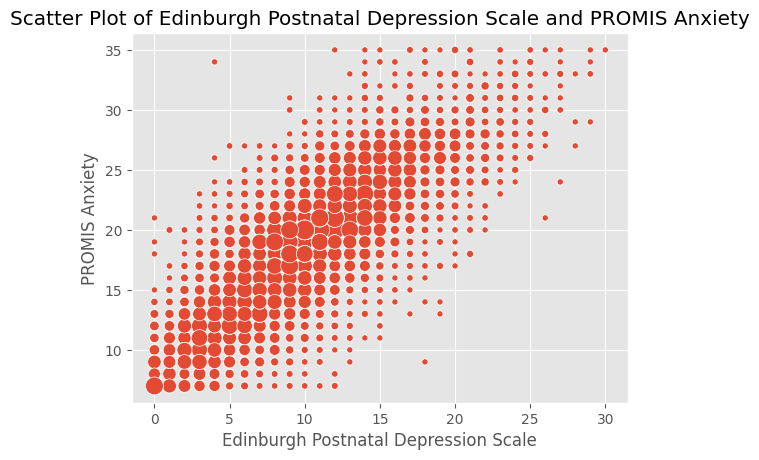

In [86]:
# Plot the scatter plot of 'Edinburgh_Postnatal_Depression_Scale' and 'PROMIS Anxiety' using the 'Frequency' as the size
df['Frequency'] = df.groupby(['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety'])['PROMIS_Anxiety'].transform('count')

sns.scatterplot(data=df, x='Edinburgh_Postnatal_Depression_Scale', y='PROMIS_Anxiety', size='Frequency', legend=False, sizes=(20, 200))
plt.title('Scatter Plot of Edinburgh Postnatal Depression Scale and PROMIS Anxiety')
plt.xlabel('Edinburgh Postnatal Depression Scale')
plt.ylabel('PROMIS Anxiety')
plt.show()
df = df.drop(columns=['Frequency'], axis=1)

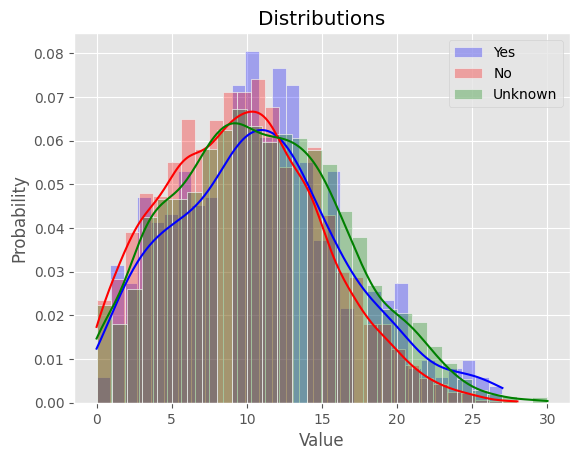

In [87]:
# Plot the distribution of the 'Edinburgh_Postnatal_Depression_Scale' column by 'NICU_Stay'
nicu_yes = df['NICU_Stay_Yes'] == 1
nicu_no = df['NICU_Stay_No'] == 1
nicu_unknown = df['NICU_Stay_Unknown'] == 1

ALPHA = 0.3
BINS = 30
COLUMN = 'Edinburgh_Postnatal_Depression_Scale'
sns.histplot(df[COLUMN][nicu_yes], bins=BINS, kde=True, color="blue", alpha=ALPHA, label='Yes', stat='probability')
sns.histplot(df[COLUMN][nicu_no], bins=BINS, kde=True, color="red", alpha=ALPHA, label='No', stat='probability')
sns.histplot(df[COLUMN][nicu_unknown], bins=BINS, kde=True, color="green", alpha=ALPHA, label='Unknown', stat='probability')

plt.legend()
plt.title('Distributions')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

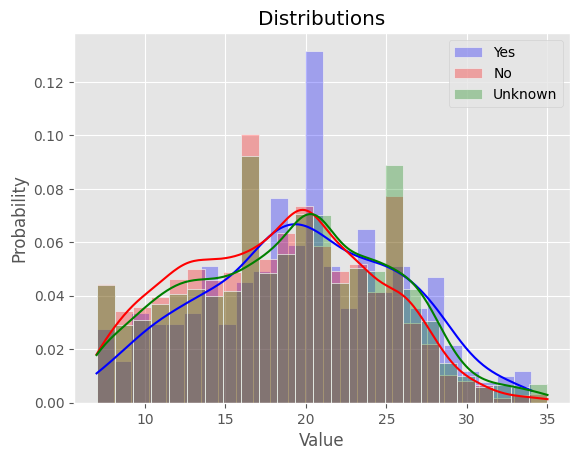

In [88]:
# Plot the distribution of the 'PROMIS_Anxiety' column by 'NICU_Stay'
nicu_yes = df['NICU_Stay_Yes'] == 1
nicu_no = df['NICU_Stay_No'] == 1
nicu_unknown = df['NICU_Stay_Unknown'] == 1

ALPHA = 0.3
BINS = 25
COLUMN = 'PROMIS_Anxiety'
sns.histplot(df[COLUMN][nicu_yes], bins=BINS, kde=True, color="blue", alpha=ALPHA, label='Yes', stat='probability')
sns.histplot(df[COLUMN][nicu_no], bins=BINS, kde=True, color="red", alpha=ALPHA, label='No', stat='probability')
sns.histplot(df[COLUMN][nicu_unknown], bins=BINS, kde=True, color="green", alpha=ALPHA, label='Unknown', stat='probability')

plt.legend()
plt.title('Distributions')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

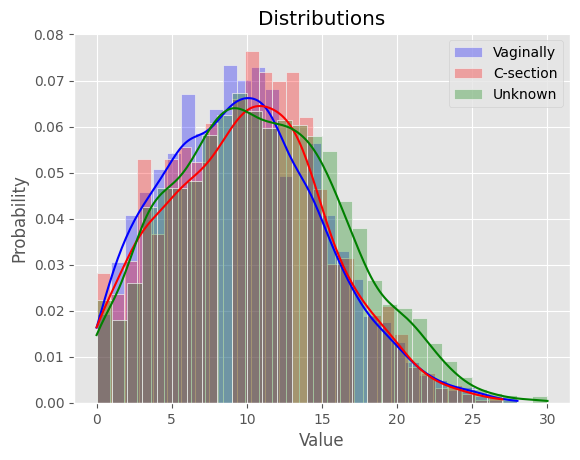

In [89]:
# Plot the distribution of the 'Edinburgh_Postnatal_Depression_Scale' column by 'Delivery_Mode'
vaginally = df['Delivery_Mode_Vaginally'] == 1
c_section = df['Delivery_Mode_C-section'] == 1
unknown = df['Delivery_Mode_Unknown'] == 1

ALPHA = 0.3
BINS = 30
COLUMN = 'Edinburgh_Postnatal_Depression_Scale'
sns.histplot(df[COLUMN][vaginally], bins=BINS, kde=True, color="blue", alpha=ALPHA, label='Vaginally', stat='probability')
sns.histplot(df[COLUMN][c_section], bins=BINS, kde=True, color="red", alpha=ALPHA, label='C-section', stat='probability')
sns.histplot(df[COLUMN][unknown], bins=BINS, kde=True, color="green", alpha=ALPHA, label='Unknown', stat='probability')

plt.legend()
plt.title('Distributions')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

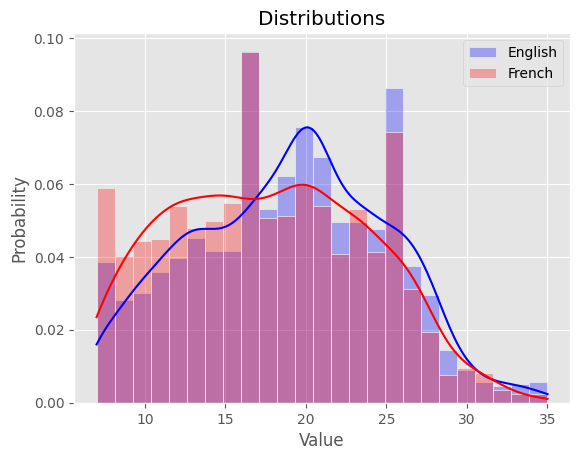

In [90]:
# Plot the distribution of the 'PROMIS_Anxiety' column by 'Language'
english = df['Language_English'] == 1
french = df['Language_French'] == 1

ALPHA = 0.3
BINS = 25
COLUMN = 'PROMIS_Anxiety'
sns.histplot(df[COLUMN][english], bins=BINS, kde=True, color="blue", alpha=ALPHA, label='English', stat='probability')
sns.histplot(df[COLUMN][french], bins=BINS, kde=True, color="red", alpha=ALPHA, label='French', stat='probability')

plt.legend()
plt.title('Distributions')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

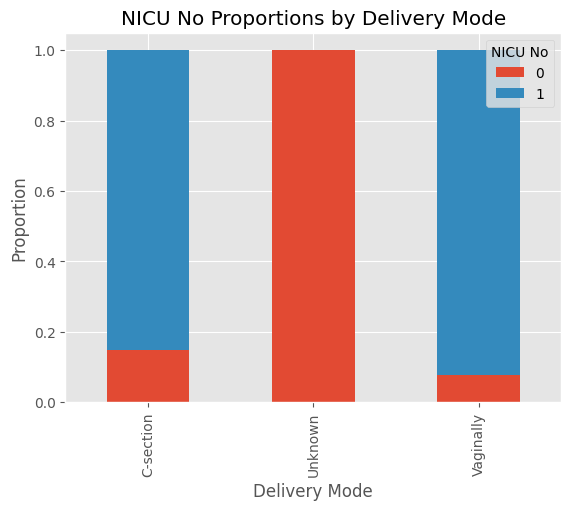

In [91]:
# Plot the distribution of the 'Delivery_Mode' column by 'NICU_Stay'
df['Delivery_Mode_Vaginally'] *= (1 - df['Delivery_Mode_Unknown'])
df['Delivery_Mode_C-section'] *= (1 - df['Delivery_Mode_Unknown'])

conditions = [
    df['Delivery_Mode_Vaginally'] == 1,
    df['Delivery_Mode_C-section'] == 1,
    df['Delivery_Mode_Unknown'] == 1
]
choices = ['Vaginally', 'C-section', 'Unknown']
df['Delivery_Mode'] = np.select(conditions, choices, default='Unknown')

proportions = df.groupby('Delivery_Mode')['NICU_Stay_No'].value_counts(normalize=True).unstack().fillna(0)
proportions.plot(kind='bar', stacked=True)
plt.title('NICU No Proportions by Delivery Mode')
plt.xlabel('Delivery Mode')
plt.ylabel('Proportion')
plt.legend(title='NICU No', labels=['0', '1'])
plt.show()

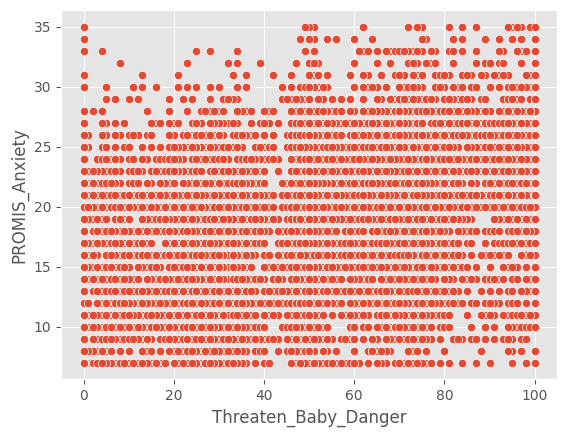

In [92]:
# Plot the scatter plot of 'Threaten_Baby_Danger' and 'PROMIS Anxiety'
sns.scatterplot(x='Threaten_Baby_Danger', y='PROMIS_Anxiety', data=df)
plt.show()

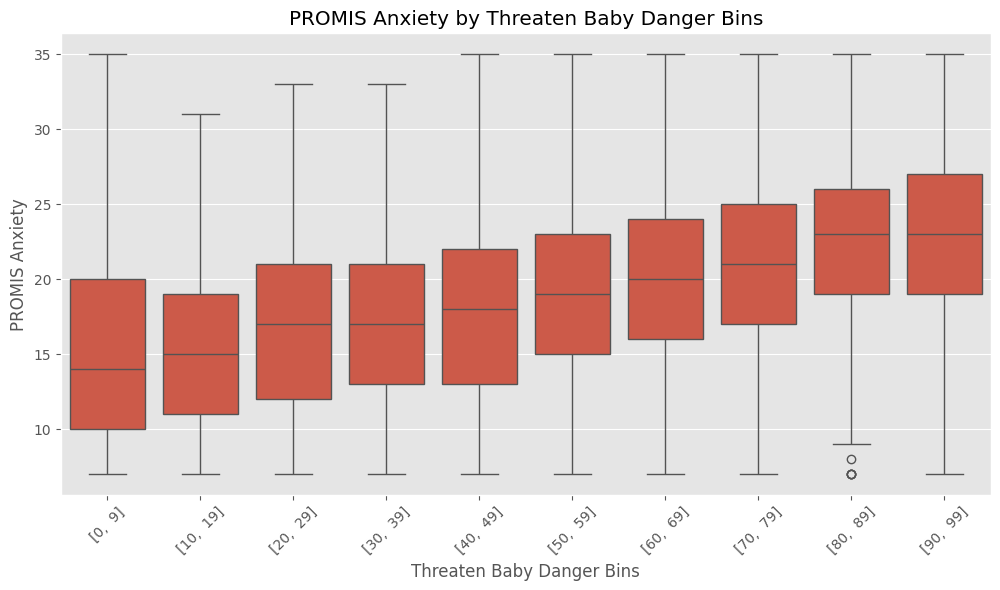

In [93]:
# Plot the boxplot of 'PROMIS Anxiety' by 'Threaten_Baby_Danger' bins
df['Threaten_Baby_Danger_Bins'] = pd.cut(df['Threaten_Baby_Danger'], bins=10, labels=[f'[{10*i},  {10*i+9}]' for i in range(10)])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Threaten_Baby_Danger_Bins', y='PROMIS_Anxiety', data=df)
plt.xticks(rotation=45)
plt.title('PROMIS Anxiety by Threaten Baby Danger Bins')
plt.xlabel('Threaten Baby Danger Bins')
plt.ylabel('PROMIS Anxiety')
plt.show()

df = df.drop(columns=['Threaten_Baby_Danger_Bins'], axis=1)

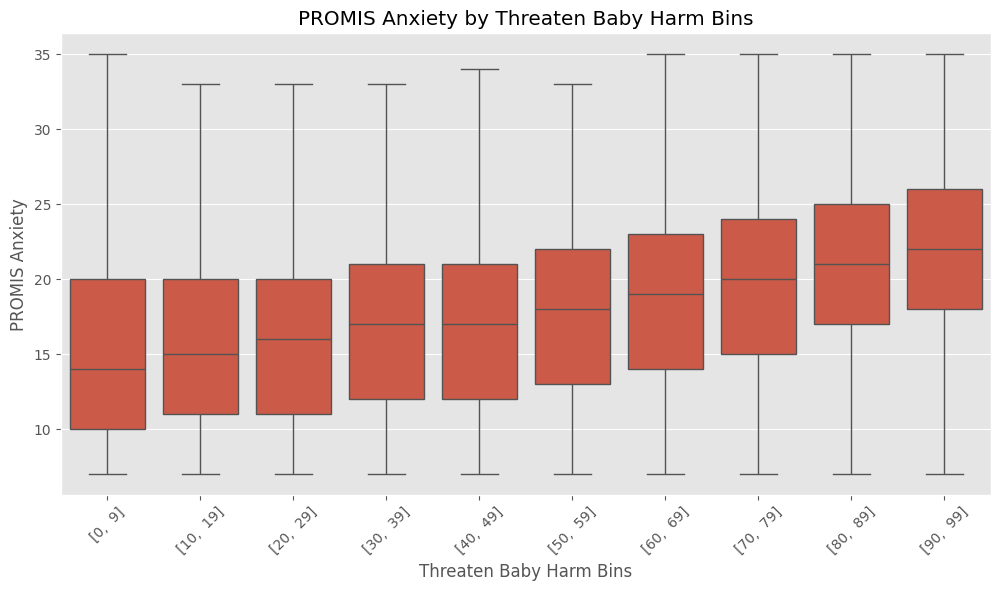

In [94]:
# Plot the boxplot of 'PROMIS Anxiety' by 'Threaten_Baby_Harm' bins
df['Threaten_Baby_Harm_Bins'] = pd.cut(df['Threaten_Baby_Harm'], bins=10, labels=[f'[{10*i},  {10*i+9}]' for i in range(10)])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Threaten_Baby_Harm_Bins', y='PROMIS_Anxiety', data=df)
plt.xticks(rotation=45)
plt.title('PROMIS Anxiety by Threaten Baby Harm Bins')
plt.xlabel('Threaten Baby Harm Bins')
plt.ylabel('PROMIS Anxiety')
plt.show()

df = df.drop(columns=['Threaten_Baby_Harm_Bins'], axis=1)

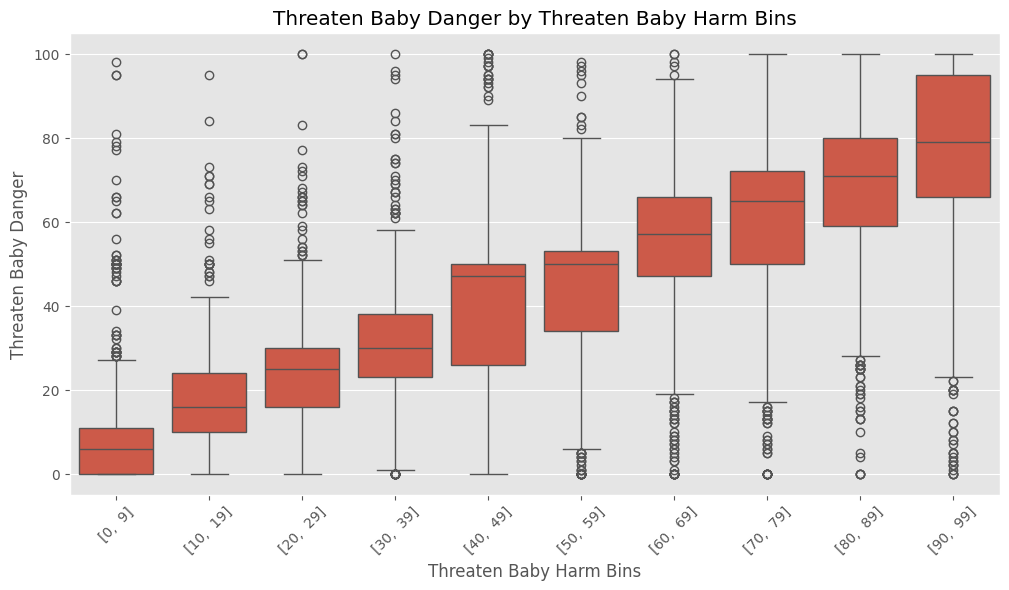

In [95]:
# Plot the boxplot of 'Threaten_Baby_Danger' by 'Threaten_Baby_Harm' bins
df['Threaten_Baby_Harm_Bins'] = pd.cut(df['Threaten_Baby_Harm'], bins=10, labels=[f'[{10*i},  {10*i+9}]' for i in range(10)])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Threaten_Baby_Harm_Bins', y='Threaten_Baby_Danger', data=df)
plt.xticks(rotation=45)
plt.title('Threaten Baby Danger by Threaten Baby Harm Bins')
plt.xlabel('Threaten Baby Harm Bins')
plt.ylabel('Threaten Baby Danger')
plt.show()

df = df.drop(columns=['Threaten_Baby_Harm_Bins'], axis=1)

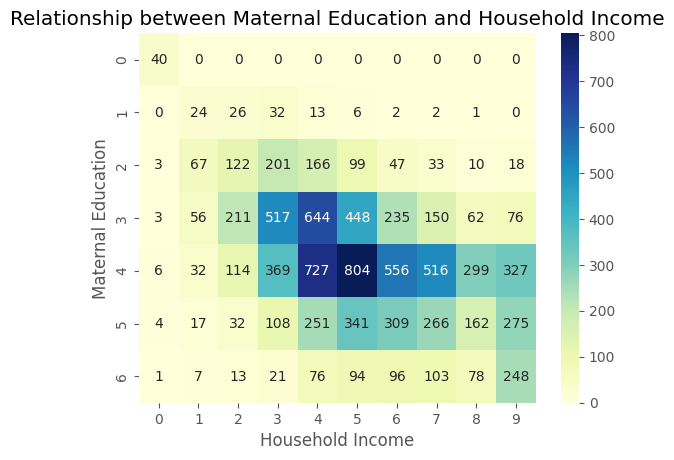

In [96]:
# Visualize the relationship between 'Maternal Education' and 'Household Income'
ct = pd.crosstab(df['Maternal_Education'], df['Household_Income'])
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Relationship between Maternal Education and Household Income')
plt.xlabel('Household Income')
plt.ylabel('Maternal Education')
plt.show()

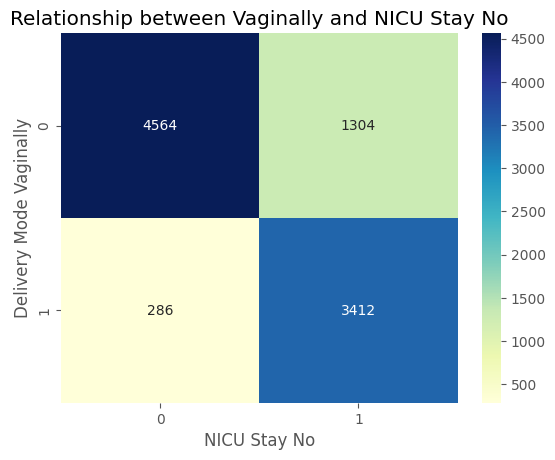

In [97]:
# Visualize the relationship between 'Delivery Mode' and 'NICU Stay No'
ct = pd.crosstab(df['Delivery_Mode_Vaginally'], df['NICU_Stay_No'])
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Relationship between Vaginally and NICU Stay No')
plt.xlabel('NICU Stay No')
plt.ylabel('Delivery Mode Vaginally')
plt.show()